In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/banking_dataset_train.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path, delimiter = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# DESCRIPTIVE STATISTICS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Observations:
- Semua tipe data sudah __sesuai__, terdapat 7 data numerik dengan tipe data "int64" dan sisanya kategorikal dengan tipe data "object".
- __Tidak terdapat__ missing value di semua variabel (semua non-null berjumlah sama dengan total entries)

In [ ]:
#Pengelompokan kolom berdasarkan jenis
nums = df.select_dtypes(include='number').columns.tolist()
cats = df.select_dtypes(exclude='number').columns.tolist()

In [ ]:
# Statistik dari setiap kolom numeric
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Observations:

- Berdasarkan hasil perhitungan statistika, terdapat **perbedaan angka antara mean dan median pada kolom balance, duration, pdays, campaign, previous.** Nilai hitung rata-ratanya (mean) lebih besar nilainya bila dibandingkan dengan kuartil tengah (median), yang mengindikasikan bahwa **grafik kurva distribusi frekuensi yang terbentuk adalah menceng kanan atau kemencengan positif.**
- Dalam hal standar deviation, kolom 'balance' memiliki nilai yang besar (3044), sehingga __berpotensi adanya outliers__ yang cukup banyak. Hal ini juga mungkin karena data nya berupa __saldo nominal uang__, sehingga jarak antar nilai nominalnya besar.
- Dalam hal nilai minimum, kolom 'balance' memiliki __nilai negatif (-8019)__, yang mungkin __tidak sesuai__ untuk saldo rekening bank. Namun, hal ini mungkin disebabkan oleh overdraft atau faktor lainnya, sehingga memerlukan penyelidikan lebih lanjut.
- Kolom 'duration' memiliki nilai __minimum 0__, yang mungkin __tidak sesuai__ untuk durasi panggilan. Hal ini mungkin menunjukkan panggilan yang terlewat atau masalah lain, sehingga memerlukan penyelidikan lebih lanjut.
- Kolom pdays memiliki nilai __minimum -1__, menurut sumber informasi data, nilai tersebut merupakan representasi __nasabah yang belum pernah dihubungi__ di campaign sebelumnya.

In [ ]:
# Statistik dari setiap kolom categorical
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


### Observations:
- Berdasarkan observasi kolom-kolom categorical, kebanyakan dari nasabah bank adalah **orang yang memiliki pekerjaan “blue-collar” atau para pekerja kasar, yang sudah menikah dengan pendidikan menengah.**
- Para nasabah tersebut sebagian besar **memiliki pinjaman rumah, yang dapat dihubungi lewat telepon seluler.** Namun, sebagian besar dari para nasabah tersebut **tidak mendepositkan uang mereka pada bank sebelumnya.**
- Dalam hal unique data, __tidak ada__ data yang terlalu beragam (karena tidak ada data id), sehingga masih bagus untuk digunakan semua.
- Dalam hal frequency, variabel __'default'__ memiliki jumlah nilai "no" yang terlalu banyak, __timpang__ dengan nilai "yes" nya, hal ini juga terjadi pada variabel 'month', 'poutcome' dan 'y' yang cukup ada ketimpangan data.

In [ ]:
#missing value dalam bentuk percentage
df.isna().sum()/len(df)*100


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

__Tidak ada missing value__, sehingga nilai persentase missing value terhadap keseluruhan data adalah 0

# UNIVARIATE STATISTICS

###Boxplot untuk variabel Numerik

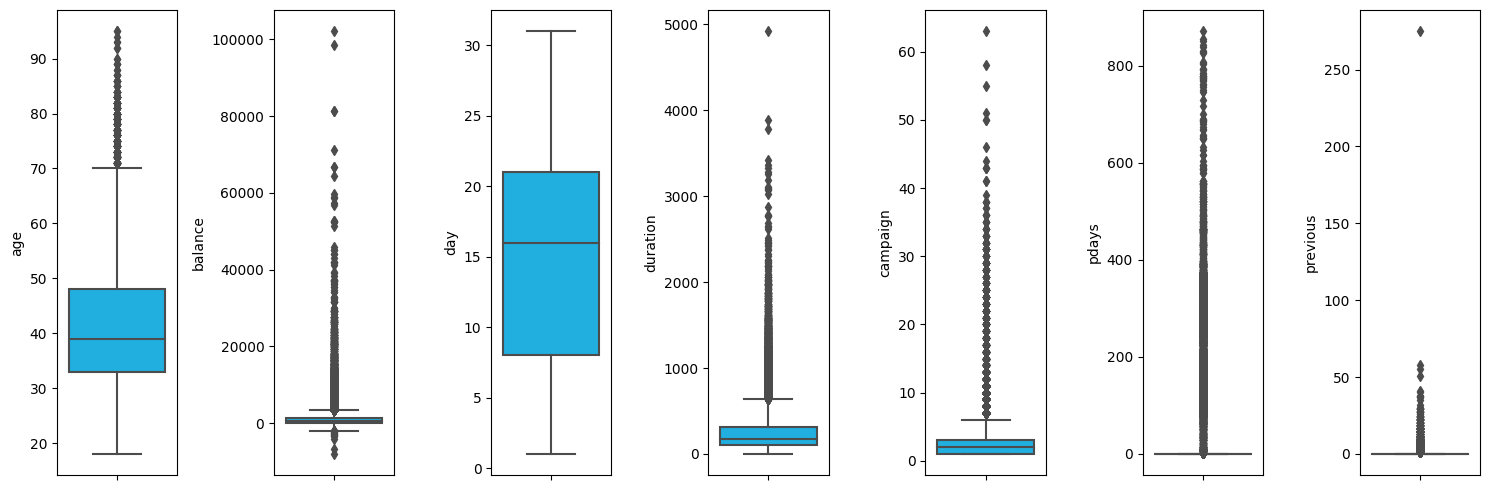

In [ ]:
plt.figure(figsize=(15,5))
for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot (y=df[nums [i]], color= 'deepskyblue',orient='v')
    plt.tight_layout()

###Observations :
<br>
- 'age' Box Plot:

Rentang usia responden antara 18 hingga 95 tahun.
Median usia responden adalah sekitar 39 tahun.
50% dari keseluruhan data __terpusat pada usia antara 33 hingga 48 tahun__.
Terdapat beberapa outlier pada sisi atas distribusi dengan usia lebih dari 70 tahun. Namun, adanya outlier dalam kolom usia (age) dianggap __wajar__ karena hanya menunjukkan variasi usia dalam populasi
Data ini cukup __bagus__ untuk digunakan dalam tahap pre-processing.
<br>
<br>
- 'balance' Box Plot:

Saldo rekening responden memiliki variasi yang sangat besar, dengan rentang dari -8019 hingga 102127.
Median saldo rekening adalah sekitar 448.
Sebagian besar responden memiliki saldo rekening di bawah 1428.
Terdapat outlier yang ekstrim pada sisi atas distribusi, menunjukkan adanya beberapa responden dengan saldo rekening yang sangat tinggi.
Secara keseluruhan, data ini memiliki outliers yang sangat ekstrim.

Saat pre-processing nanti, disarankan untuk __mengubah data minus menjadi 0__, dan __menghapus__ atau __mentransformasi__ data untuk menangani __outliers__ yang ekstrim.
<br>
<br>
- 'day' Box Plot:

Mayoritas hari terakhir responden dikontak antara __hari ke 8 hingga ke 21__.
Secara umum, distribusi data cenderung normal tanpa terlihat outliers.

Data ini cukup __bagus__ untuk digunakan dalam tahap pre-processing.
<br>
<br>
- 'duration' Box Plot:

Durasi panggilan memiliki rentang yang cukup besar, dengan rentang dari 0 hingga 4918 detik (sekitar 82 menit).
Median durasi panggilan adalah sekitar 180 detik (3 menit).
Terdapat __beberapa outlier__ ekstrem pada sisi atas distribusi, yang menunjukkan adanya panggilan dengan durasi yang sangat panjang. Outlier ini mungkin merupakan panggilan yang berlangsung sangat lama dan berbeda secara signifikan dari mayoritas panggilan lainnya.

Dalam tahap __pre-processing__, variabel ini perlu __dibersihkan__ dari beberapa __outliers yang paling ekstrim__ demi meningkatkan performa model.
<br>
<br>
- 'campaign' Box Plot:

Jumlah kontak yang dilakukan selama kampanye berkisar antara 1 hingga 63.
Median jumlah kontak adalah sekitar 2.
Terdapat beberapa outlier ekstrem pada sisi atas distribusi, menunjukkan adanya beberapa responden dengan jumlah kontak yang sangat tinggi. Outlier ini mungkin merupakan responden yang mendapatkan lebih banyak kontak daripada mayoritas responden lainnya selama kampanye.

Dalam tahap __pre-processing__, variabel ini perlu __dibersihkan__ dari beberapa __outliers yang paling ekstrim__ serta __mengganti__ nilai (-1) menjadi 0 agar lebih masuk akal demi meningkatkan performa model.
<br>
<br>
- 'pdays' Box Plot:

Jumlah hari sejak kontak terakhir dari kampanye sebelumnya memiliki variasi yang cukup besar, dengan rentang dari -1 hingga 871.
Median jumlah hari adalah -1, yang menunjukkan bahwa mayoritas responden belum pernah dikontak pada campaign sebelumnya.
Terdapat banyak outliers yang sangat ekstrim pada sisi atas distribusi, dengan beberapa outlier yang sangat tinggi (hingga 871). Hal ini menunjukkan adanya sejumlah kecil responden yang telah dikontak dalam jangka waktu yang sangat lama sejak kampanye sebelumnya.

Dalam tahap __pre-processing__, variabel ini perlu __ditransformasi__ untuk menangani beberapa __outliers yang paling ekstrim__ demi meningkatkan performa model.
<br>
<br>
- 'previous' Box Plot:

Jumlah kontak sebelum kampanye saat ini berkisar dari 0 hingga 275.
Mayoritas responden tidak memiliki kontak sebelum kampanye saat ini, seperti yang ditunjukkan oleh median yang rendah (-1).
Terdapat banyak outliers ekstrim pada sisi atas distribusi, dengan beberapa outlier yang sangat tinggi (hingga 275). Hal ini menunjukkan adanya sejumlah kecil responden yang telah memiliki banyak kontak sebelum kampanye saat ini.

Dalam tahap __pre-processing__, variabel ini perlu __dibersihkan__ dari sedikit __outliers yang paling mencolok__ di sisi paling atas distribusi demi meningkatkan performa model.



### Histogram Plot untuk Variabel Numerik

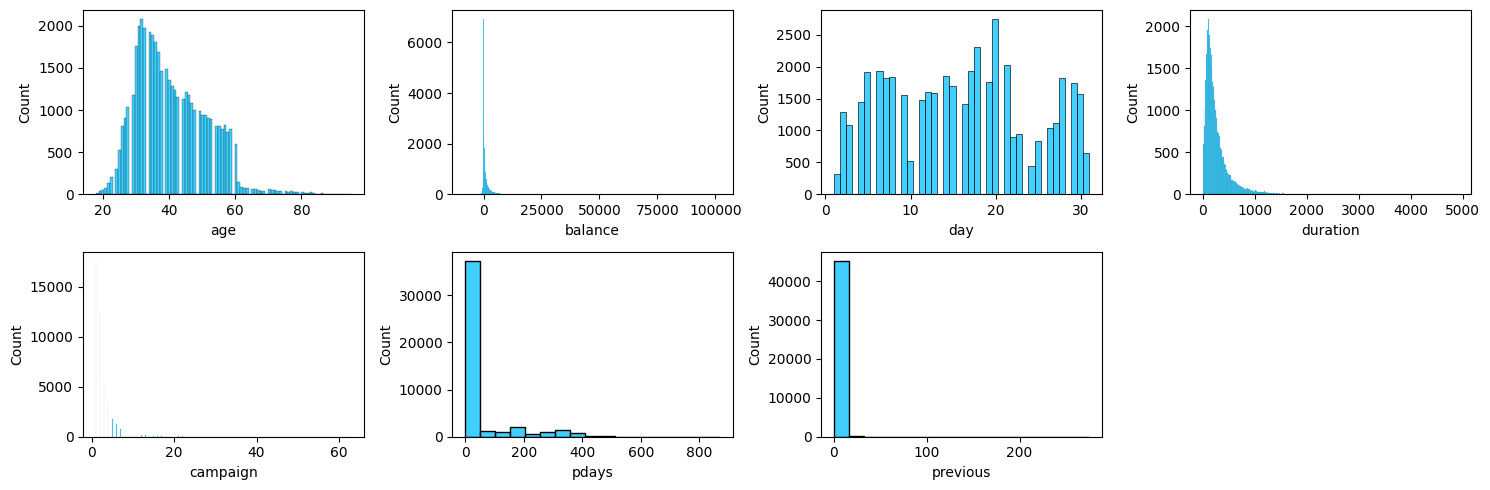

In [ ]:
plt.figure(figsize=(15,5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.histplot(x=df[nums[i]], color='deepskyblue')
    plt.xlabel(nums[i])
    plt.tight_layout()

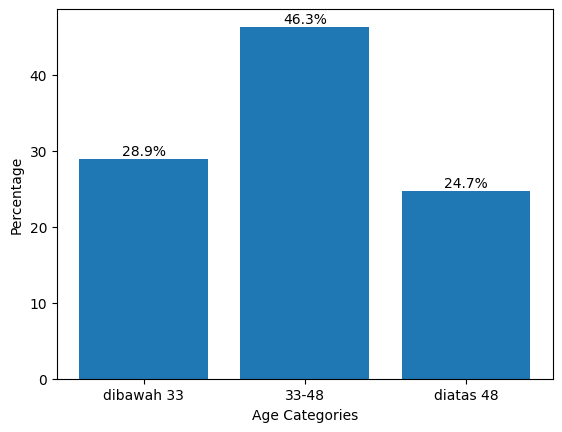

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil data kolom "age"
ages = df['age']

# Tentukan batas-batas bin
bins = [0, 33, 48, float('inf')]

# Bagi data menjadi tiga kategori
age_categories = pd.cut(ages, bins, labels=['dibawah 33', '33-48', 'diatas 48'])
age_counts = age_categories.value_counts()
total_respondents = len(df)
age_percentages = age_counts / total_respondents * 100

# Mengurutkan berdasarkan labels
age_percentages = age_percentages.sort_index()

# Membuat barplot
plt.bar(age_percentages.index, age_percentages)

# Menambahkan persentase nilai di setiap bar
for i, percentage in enumerate(age_percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center')

# Menambahkan label sumbu x dan y
plt.xlabel('Age Categories')
plt.ylabel('Percentage')

# Menampilkan plot
plt.show()

###Observations :
<br>

- Kolom "age":

Distribusi umur awalnya tampaknya cukup __normal__, tidak ada indikasi skewness yang signifikan. Setelah __dikelompokkan__ menjadi 3 kelompok usia, terlihat bahwa kategori usia mayoritas pada usia __33-38 tahun__, membuat distribusi menjadi __lebih normal__.

__Tidak ada__ tindakan khusus yang perlu diambil dalam data pre-processing untuk kolom ini.
<br>
<br>
- Kolom "balance":

Distribusi saldo tampaknya sangat skew ke kanan (positively skewed) dengan nilai maksimum yang jauh lebih tinggi dan sangat timpang dari nilai-nilai lainnya. Hal ini menunjukkan banyaknya outlier bernilai besar yang mempengaruhi distribusi data.

Saat melakukan __pre-processing__ data, dapat dilakukan __penghapusan__ outlier yang berada di luar kisaran nilai yang masuk akal dengan menentukan batasan atas dan bawah atau melakukan __transformasi data__ (log transformation), atau bisa juga menggunakan __IQR__.
<br>
<br>
- Kolom "day":

Distribusi kolom ini terlihat sedikit multi-modal, namun tidak begitu signifikan.

__Tidak ada__ tindakan khusus yang perlu diambil dalam data pre-processing untuk kolom ini.
<br>
<br>
- Kolom "duration":

Distribusi durasi panggilan juga sangat __skew ke kanan__, dengan nilai maksimum yang jauh lebih tinggi dari nilai-nilai lainnya.

Saat melakukan pre-processing data, perlu diperhatikan penanganan outlier, seperti __transformasi data__ (misalnya log transform) atau penggunaan teknik __penggantian outlier__ (misalnya menggunakan batas atas atau bawah yang relevan).
<br>
<br>
- Kolom "campaign":

Distribusi jumlah panggilan kampanye cenderung __positively skewed__, dengan sebagian besar nasabah menerima panggilan dalam jumlah yang sedikit. Terdapat nilai maksimum yang jauh lebih tinggi dari nilai-nilai lainnya, menunjukkan adanya beberapa nasabah yang menerima panggilan kampanye dalam jumlah yang sangat banyak.

Saat melakukan pre-processing data, perlu diperhatikan penanganan outlier pada data distribusi atas, seperti __transformasi data__ (misalnya log transform) atau penggunaan teknik __penggantian outlier__ (misalnya menggunakan batas atas atau bawah yang relevan).
<br>
<br>
- Kolom "pdays":

Distribusi nilai pdays sangat __skew ke kanan__, dengan sebagian besar nilai berada pada __-1 (non-called)__.

Saat melakukan __pre-processing__ data, nilai -1 dapat __diganti__ dengan nilai yang lebih bermakna seperti 0 untuk menandai klien yang tidak pernah dihubungi sebelumnya.
<br>
<br>
- Kolom "previous":

Distribusi jumlah kontak sebelum kampanye saat ini juga sangat __skew ke kanan__, dengan nilai maksimum (275) yang jauh lebih tinggi dari nilai-nilai lainnya.

Saat melakukan __pre-processing data__, dapat dilakukan __penghapusan__ outlier yang berada di luar kisaran nilai yang masuk akal.

### Barplot untuk Variabel Kategorikal

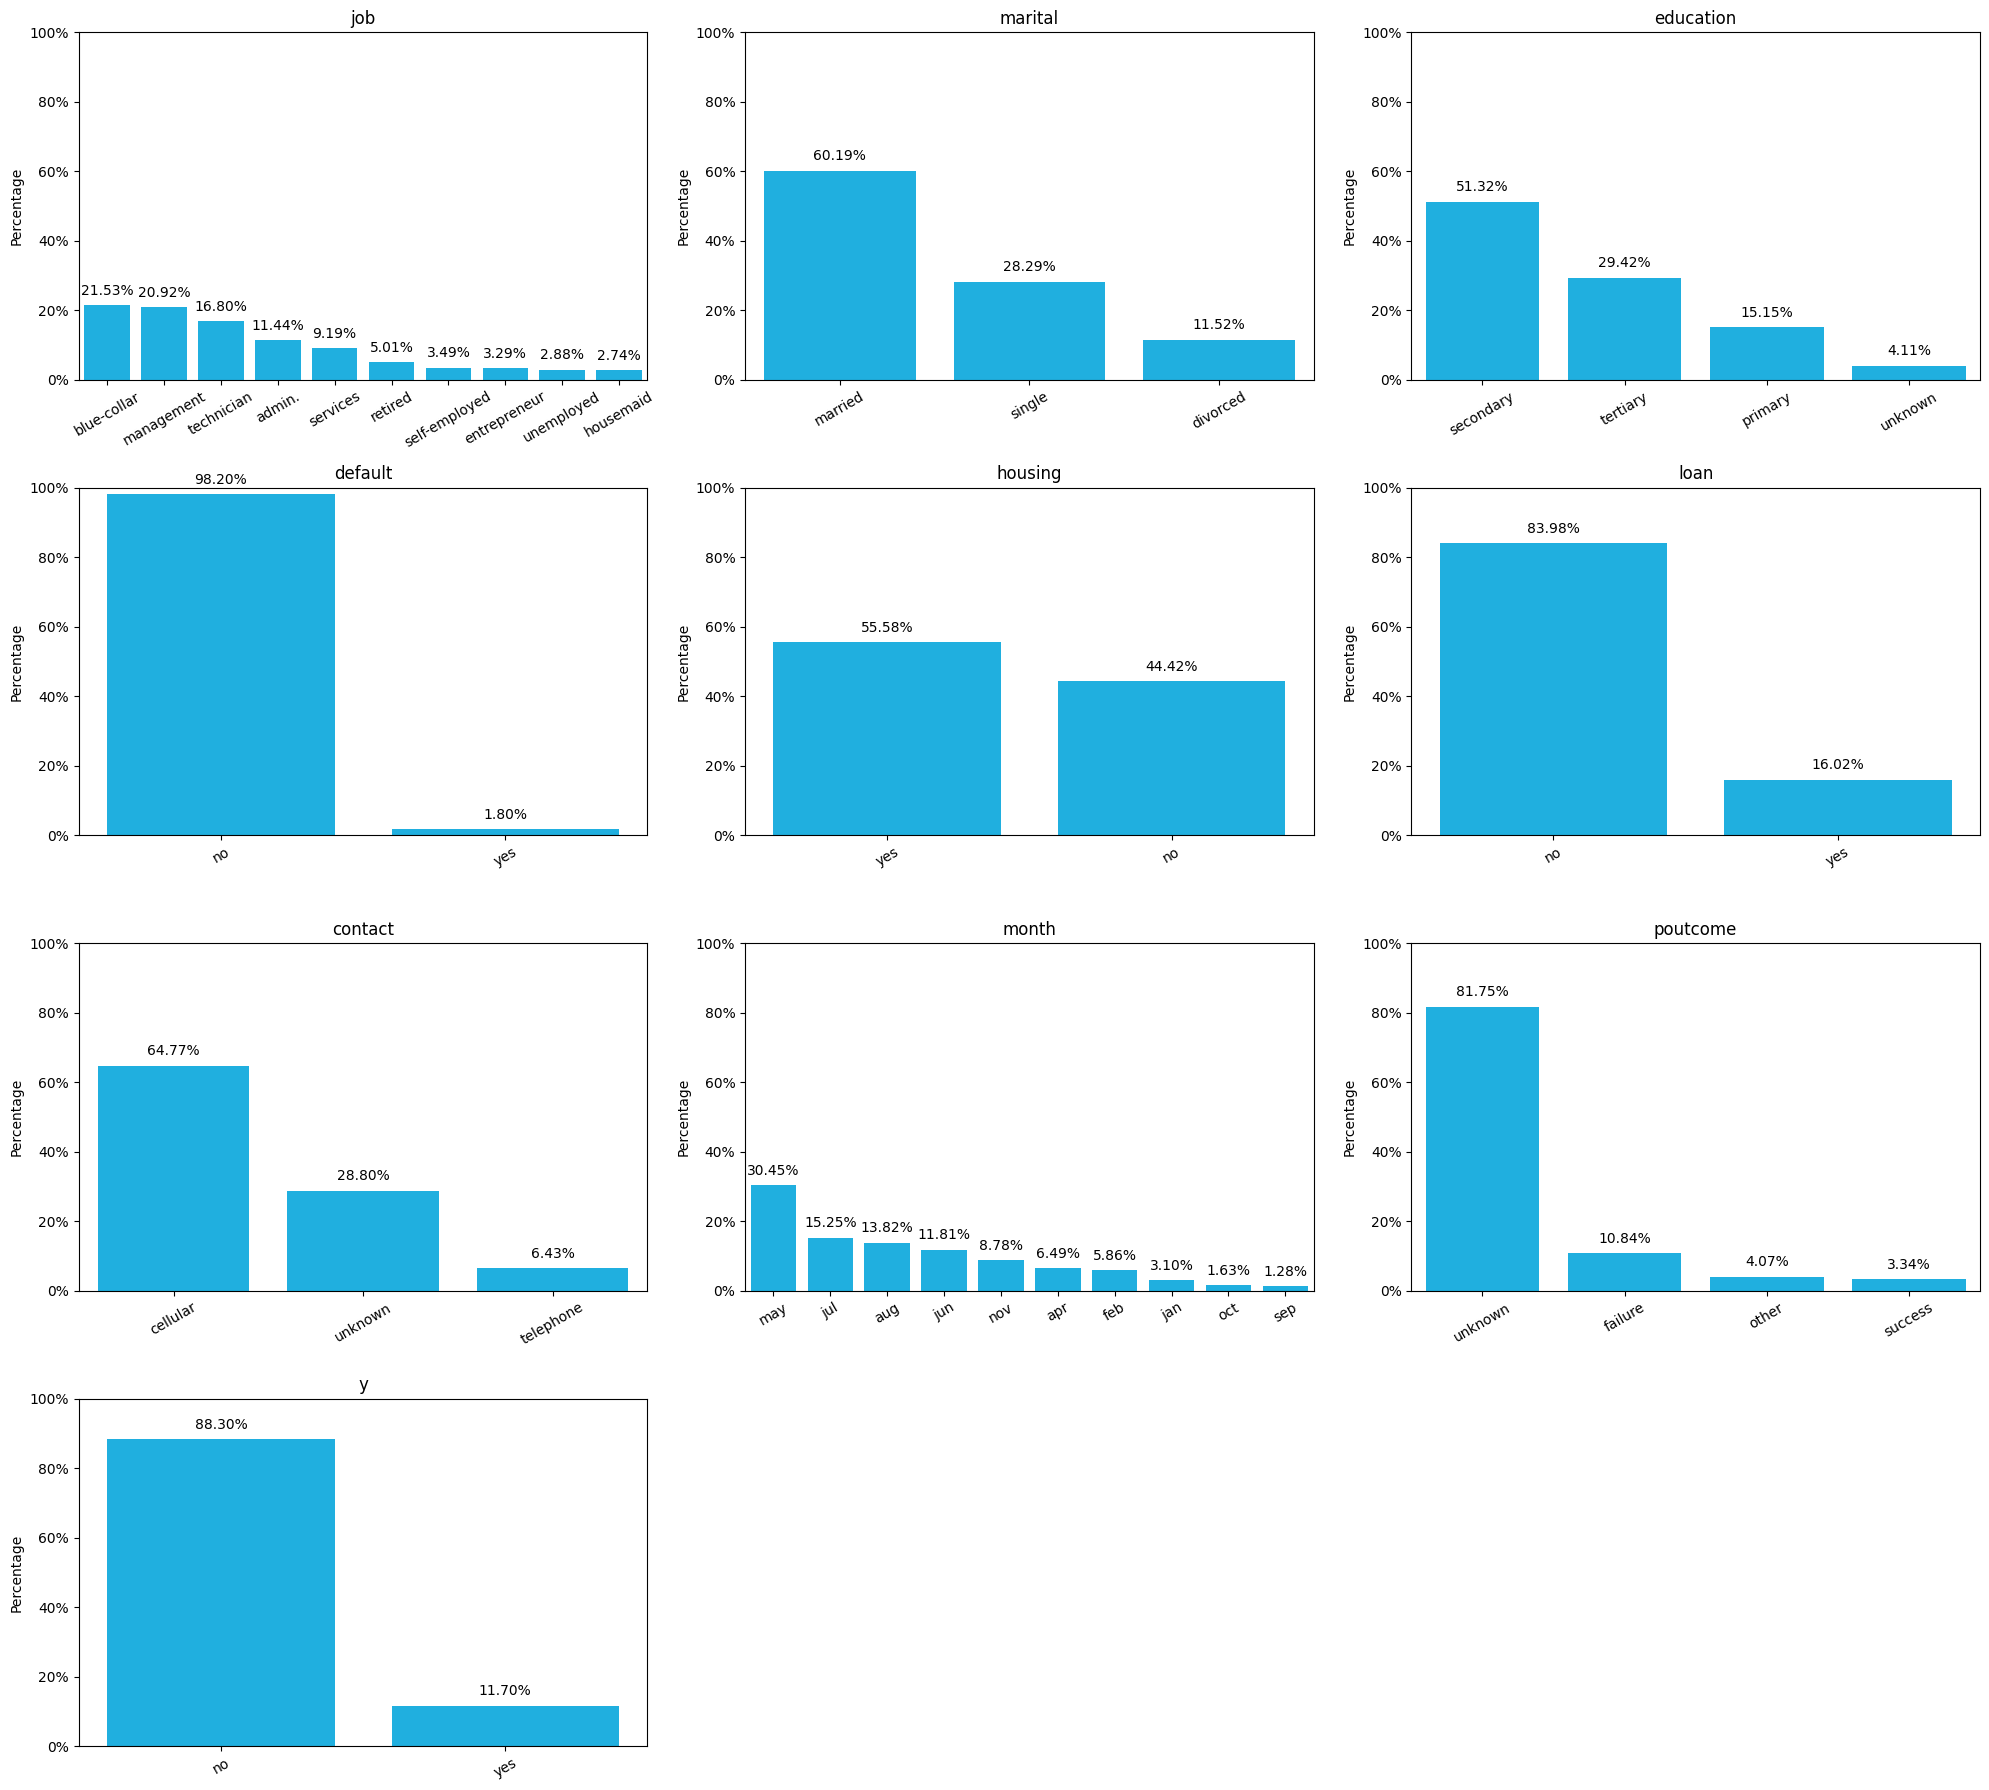

In [ ]:
import matplotlib.ticker as mtick
plt.figure(figsize=(20, 18))
for i, col in enumerate(cats, 1):
    plt.subplot(4, 3, i)
    percentages = (df[col].value_counts() / len(df) * 100)[:10]
    ax = sns.barplot(x=percentages.index, y=percentages.values, color='deepskyblue')
    ax.set_title(col)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation=30)

    for p, percentage in zip(ax.patches, percentages.values):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}%'.format(percentage), ha='center')

plt.tight_layout()
plt.show()

###Observations :
<br>

- Variabel "job":

Pekerjaan __Blue-collar dan management__ berturut-turut menjadi pekerjaan yang paling umum, sedangkan pekerjaan Housemaid dan unemployed (pengangguran) merupakan minoritas bagi nasabah Bank disini.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "marital":

Mayoritas nasabah dalam dataset ini adalah yang __sudah menikah (60.19%)__ sedangkan yang paling sedikit adalah nasabah yang telah bercerai atau janda.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>

*   Variabel "education":

Setengah dari keseluruhan nasabah memiliki pendidikan terakhir pada __tingkat secondary__ (biasanya setingkat SMA). Namun, persentase paling kecil nasabah adalah yang tingkat pendidikannya tidak diketahui (unknown).

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "default":

Hampir semua nasabah disini (98.20%) __tidak memiliki masalah default__ pada pinjaman atau kredit macet.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "housing":

Lebih dari setengah nasabah (55.58%) __memiliki KPR__ (housing loan).

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "loan":

Mayoritas responden (83.98%) __tidak memiliki pinjaman__ pribadi.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "contact":

Sebagian besar kontak yang dilakukan oleh marketer dilakukan melalui __panggilan seluler (64.77%)__.
Sekitar 28.80% nasabah dikontak menggunakan metode yang tidak diketahui (unknown).
Kontak panggilan melalui telepon rumah menjadi yang paling sedikit dilakukan marketer.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "month":

Kontak terakhir yang dilakukan marketer kepada nasabah pada tahun tersebut paling banyak dilakukan pada __bulan Mei (30.45%)__ atau pertengahan kuartal II.

Saat data pre-processing, pertimbangkan untuk __menggabungkan__ bulan-bulan ke dalam kategori yang lebih luas (misalnya musim atau kuartal) untuk analisis atau pemodelan yang lebih baik.
<br>
<br>
- Variabel "poutcome":

Sebagian besar hasil pemasaran sebelumnya __tidak diketahui (unknown) (81.75%)__ sedangkan hasil sukses memberikan jumlah yang paling sedikit.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "y":

Mayoritas nasabah (88.30%) __tidak berlangganan__ deposito berjangka pada periode sebelumnya.

Saat data pre-processing, memastikan pemrosesan kelas target yang tepat saat membangun model, seperti __mengubah__ nilai "yes" menjadi 1 dan "no" menjadi 0, selanjutnya berdasarkan data yang __imbalanced__, perlu dipertimbangkan juga untuk melakukan __undersampling__.

- Variabel "age segmentation":

Mayoritas (46%) responden berada di rentang umur **33-48 tahun**.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.

# MULTIVARIATE ANALYSIS

## Hubungan antar Variabel Numerik

In [ ]:
df.corr()

<ipython-input-92-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### Correlation Heatmap

<ipython-input-93-b10202ae2df4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True,  fmt='.2f')


<Axes: >

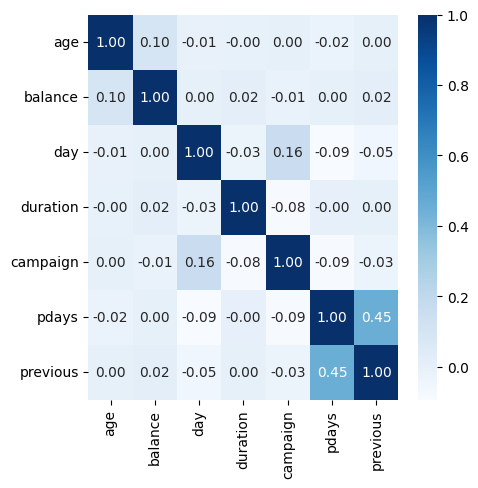

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='Blues', annot=True,  fmt='.2f')
#perlu make sure multi kolinearitas (hub antar var x)

###Observations :
- Berdasarkan heatmap korelasi untuk feature numerik di atas, terlihat bahwa feature 'pdays' dan 'previous' memiliki korelasi yang masuk dalam kategori __moderate correlation (0.45)__.
- Selain korelasi 2 feature yang telah disebutkan, sisanya berkorelasi lemah atau sangat lemah.

###Tindak Lanjut :
- Feature __'pdays'__ dipertimbangkan untuk __tidak dimasukkan__ dalam analisis sedangkan feature __'previous' dipertahankan__. Hal ini karena dari sisi persebaran data, 'pdays' memiliki banyak __outliers__ yang lebih ekstrim, memiliki nilai __mayoritas -1__ (kurang relevan untuk merepresentasikan nasabah yang belum pernah dihubungi) dan juga memiliki __standar deviasi__ yang sangat besar ketimbang 'previous'.
- Feature __'duration'__ juga __dipertimbangkan untuk tidak dimasukkan__ dalam analisis dikarenakan banyaknya nasabah yang belum pernah dihubungi di campaign sebelumnya sehingga __banyak nilai 0__, namun ini butuh __penyelidikan lebih lanjut__.


### __Scatter Plot__ untuk melihat hubungan antar variabel Numerik dan Label (Target)

In [ ]:
# plt.figure(figsize=(15,15))
# sns.pairplot(df, diag_kind='kde', hue='y')


###Observation :
- Pada hubungan feature __'age' dan 'duration'__, terlihat ada pola yang __menarik__ dimana rata-rata nasabah yang __tidak deposit__ memiliki nilai __durasi yang rendah__, sedangkan semakin lama durasi, kemungkinan deposit menjadi semakin tinggi tidak peduli berapapun __usianya__.
- Hubungan feature __'day' dan 'duration'__ juga mirip dengan yang di atas, dimana __semakin lama durasi__ semakin __tinggi__ kemungkinan __nasabah untuk deposit__ tidak peduli di __hari apa__ kontak terakhir dilakukan.
- Hubungan feature __'age' dan 'campaign'__ juga memiliki pola yang sedikit __menarik__, dimana semakin __banyak campaign__ atau kontak yang dilakukan justru kecenderungan nasabah untuk berlangganan deposit berjangka __semakin kecil__ tidak peduli berapapun __usia__ nasabah.
- Sisanya tidak menunjukkan hubungan dan pola yang menarik terhadap label.

###Tindak Lanjut :
- Selain feature 'pdays' yang kemungkinan di __buang__ dan 'duration' yang akan __dipertimbangkan__ lebih lanjut, sisanya cukup relevan untuk dipertahankan.



###__Stacked Bar Chart__ untuk melihat hubungan variabel kategorikal dengan Label (Target)

####  Functions untuk pivot table dan display stacked bar chart (keep hidden recommended)

In [ ]:
## Untuk pivot yang ada nominalnya
def pivot_table(c):
    categorical_pivot = {}
    for i in c:
        pivot_temp = pd.pivot_table(df,
                           index = [i],
                           columns=['y'],
                           aggfunc = {i : "count"}
                          ).reset_index()
        pivot_temp.columns = [i.capitalize(), "Do not deposit", "Deposit"]
        pivot_temp["Deposit"].sum()+pivot_temp["Do not deposit"].sum()
        pivot_temp["Percent who deposit"] = (pivot_temp["Deposit"]/(pivot_temp["Deposit"]+pivot_temp["Do not deposit"])*100)
        pivot_temp["Percent who don't deposit"] = (pivot_temp["Do not deposit"]/(pivot_temp["Deposit"]+pivot_temp["Do not deposit"])*100)
        pivot_temp=pivot_temp.set_index(i.capitalize())
        categorical_pivot[i]=pivot_temp

    return categorical_pivot
# pivot yang hanya persentase
def pivot_table_percent_only(c):
    categorical_pivot = {}
    for i in c:
        pivot_temp = pd.pivot_table(df,
                           index = [i],
                           columns=['y'],
                           aggfunc = {i : "count"}
                          ).reset_index()
        pivot_temp.columns = [i.capitalize(), "0", "1"]
        pivot_temp["1"].sum()+pivot_temp["0"].sum()
        pivot_temp["Percent who deposit"] = (pivot_temp["1"]/(pivot_temp["1"]+pivot_temp["0"]))
        pivot_temp["Percent who don't deposit"] = (1-pivot_temp["Percent who deposit"])
        pivot_temp = pivot_temp.drop(columns=["0","1"]).set_index(i.capitalize())
        categorical_pivot[i]=pivot_temp

    return categorical_pivot

# buat display semua pivot table
def display_pivots(b):
    for x,y in b.items():
      if x!='y':
        print(f'{x.capitalize()} and Y relationship \n')
        display(y)
      else:
        continue
# buat display satu pivot table
def display_single_pivot(p1):
    display(p1)

# buat plot semua pivot di stacked bar plot
def plot_pivots(b):
    for x,y in b.items():
      if x!='y':
        y.plot(kind='bar', stacked=True)
      else:
        continue
# buat plot satu pivot di stacked bar plot
def plot_one_pivot(p1):
    p1.plot(kind='bar', stacked=True)

#### Pivot Tables

In [ ]:
cats_pivot = pivot_table(cats)

display_pivots(cats_pivot)

Job and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Job,,,,
admin.,4540,631,12.202669,87.797331
blue-collar,9024,708,7.274969,92.725031
entrepreneur,1364,123,8.271688,91.728312
housemaid,1131,109,8.790323,91.209677
management,8157,1301,13.755551,86.244449
retired,1748,516,22.791519,77.208481
self-employed,1392,187,11.842939,88.157061
services,3785,369,8.883004,91.116996
student,669,269,28.678038,71.321962


Marital and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Marital,,,,
divorced,4585,622,11.945458,88.054542
married,24459,2755,10.123466,89.876534
single,10878,1912,14.949179,85.050821


Education and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Education,,,,
primary,6260,591,8.626478,91.373522
secondary,20752,2450,10.559435,89.440565
tertiary,11305,1996,15.006390,84.993610
unknown,1605,252,13.570275,86.429725


Default and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Default,,,,
no,39159,5237,11.796108,88.203892
yes,763,52,6.380368,93.619632


Housing and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Housing,,,,
no,16727,3354,16.702355,83.297645
yes,23195,1935,7.699960,92.300040


Loan and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Loan,,,,
no,33162,4805,12.655727,87.344273
yes,6760,484,6.681391,93.318609


Contact and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Contact,,,,
cellular,24916,4369,14.918900,85.081100
telephone,2516,390,13.420509,86.579491
unknown,12490,530,4.070661,95.929339


Month and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Month,,,,
apr,2355,577,19.679400,80.320600
aug,5559,688,11.013286,88.986714
dec,114,100,46.728972,53.271028
feb,2208,441,16.647792,83.352208
jan,1261,142,10.121169,89.878831
jul,6268,627,9.093546,90.906454
jun,4795,546,10.222805,89.777195
mar,229,248,51.991614,48.008386
may,12841,925,6.719454,93.280546


Poutcome and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Poutcome,,,,
failure,4283,618,12.609671,87.390329
other,1533,307,16.684783,83.315217
success,533,978,64.725347,35.274653
unknown,33573,3386,9.161503,90.838497


#### Stacked Bar Chart

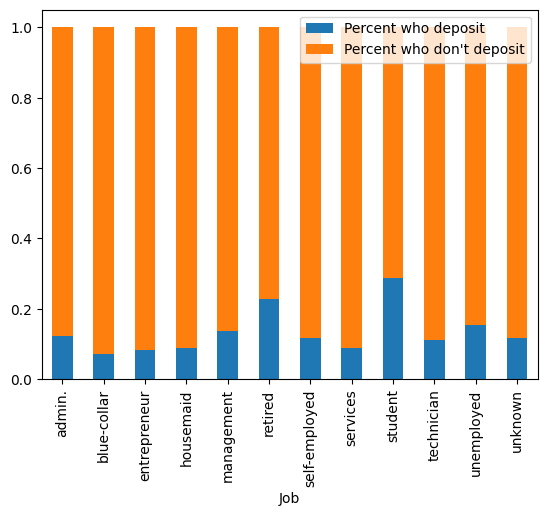

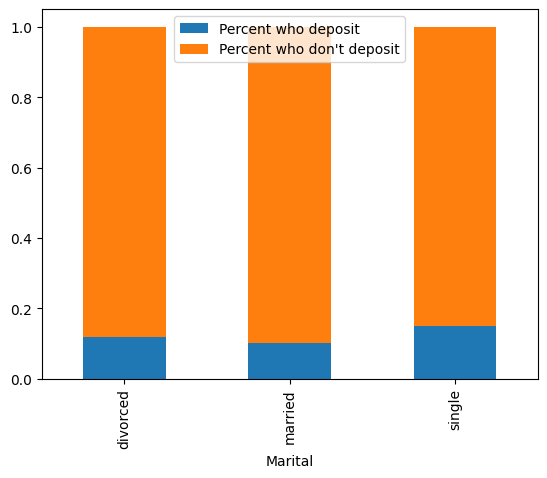

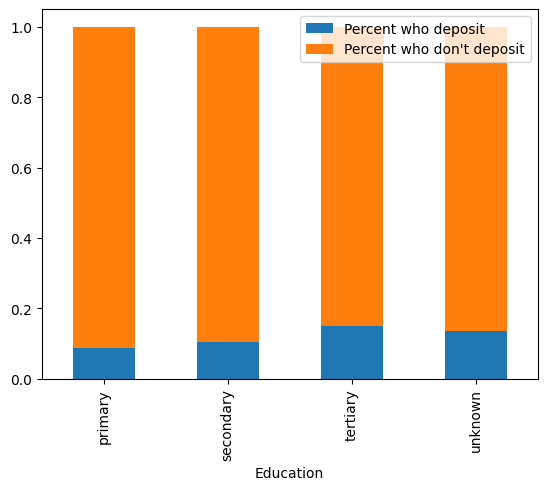

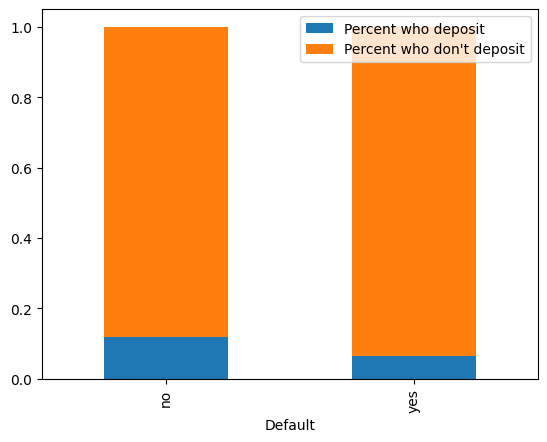

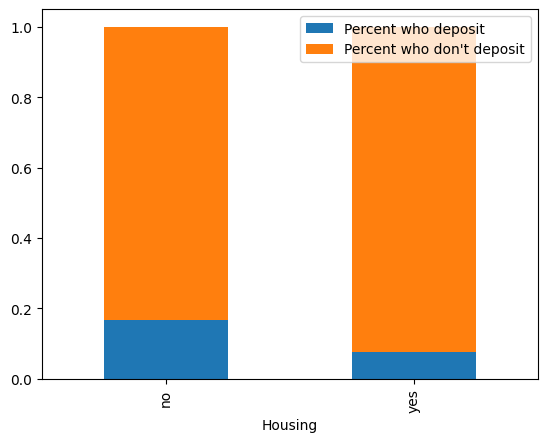

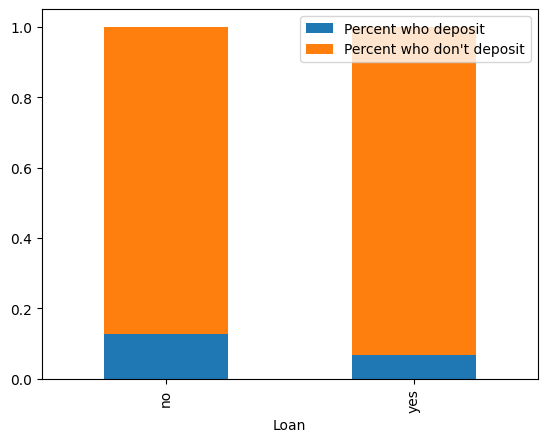

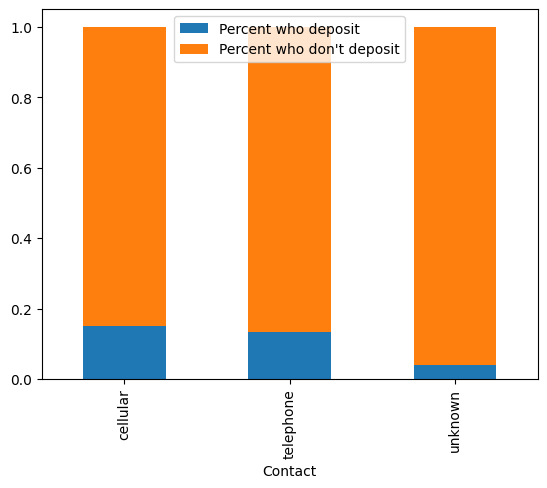

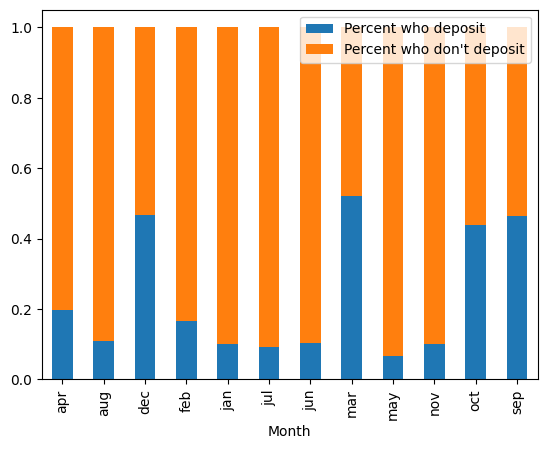

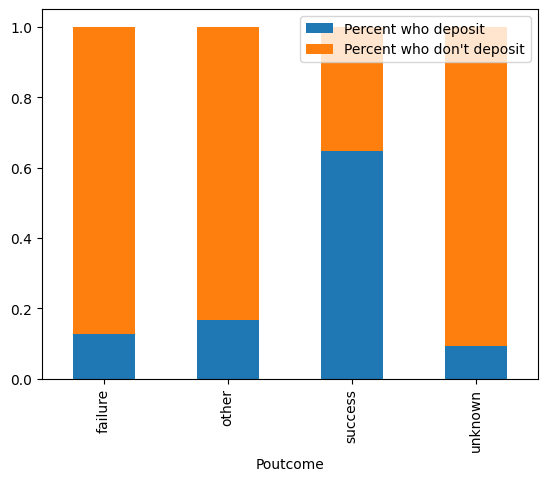

In [ ]:
#cats_pivots=pivot_table(cats)
cats_pivots_pct = pivot_table_percent_only(cats)
#display_pivots(cats_pivots_pct)

plot_pivots(cats_pivots_pct)

###Observations :
<br>

- Feature __'Job'__

Secara conversion rate, nasabah yang berkesibukan sebagai __pelajar__ memiliki persentase ketertarikan __tertinggi__ untuk berlangganan deposito. Hal ini mungkin karena berlangganan deposito menjadi target yang ingin dilakukan saat pertama kali membuka rekening di bank (mungkin berpikir untuk investasi sejak dini). Ini juga berarti peluang untuk nasabah pelajar untuk convert adalah yang tertinggi. Untuk retired juga persentasenya kedua tertinggi, hal ini mungkin nasabah menyimpan tabungan pensiunnya pada deposito berjangka.
<br>
<br>
- Feature __'Marital'__

Jika dilihat dari marital status, nasabah dengan status __‘single’__ memiliki persentase __paling tinggi__ meskipun tidak begitu jauh dibanding yang lain, mungkin karena banyak dari nasabah single memiliki __spare uang__ lebih untuk bisa di investasikan. Namun, perbedaan conversion rate tidak terlihat signifikan.
<br>
<br>
- Feature __'Education'__

Jika dilihat dari conversion ratenya, maka dapat disimpulkan bahwa semakin tinggi pendidikan nasabah, peluang convertnya juga semakin tinggi __(Tertiary atau biasanya tingkat perguruan tinggi)__. Pendidikan terakhir yang tinggi juga dapat mencerminkan stabilitas keuangan dan minat yang lebih besar dalam produk atau layanan yang ditawarkan, yang pada akhirnya dapat meningkatkan kemungkinan nasabah untuk melakukan tindakan konversi. Hal tersebut mungkin karena semakin tinggi pendidikan formal, semakin tinggi pula iterasi keuangan seseorang.
<br>
<br>
- Feature __'Default'__

Nasabah yang __tidak memiliki masalah__ dengan default atau kredit macet lebih banyak yang __berlangganan deposit__ ketimbang yang terkena masalah. Hal ini mungkin karena mereka memiliki stabilitas keuangan yang lebih baik.
<br>
<br>
- Feature __'Housing'__

Nasabah yang __belum pernah mengajukan KPR__ cenderung __lebih banyak__ berlangganan produk deposit. Ini karena nasabah yang tidak mengajukan KPR cenderung memiliki spare dana untuk berlangganan deposito berjangka. Persentase konversi nasabah yang tidak memiliki KPR juga memiliki nilai lebih dari 2 kali lipat dari yang punya KPR.
<br>
<br>

- Feature __'loan'__

Senada dengan faktor KPR, nasabah yang __belum pernah__ mengajukan pinjaman pribadi juga __lebih tinggi__ persentase berlangganannya. Hal ini juga karena spare dana lebih banyak jika tidak memiliki pinjaman lain. Perbedaan persentase yang tidak punya pinjaman juga hampir 2 kali lipat nasabah yang memiliki pinjaman.
<br>
<br>
- Feature __'contact'__

Jenis kontak melalui __seluler__ memiliki __persentase tertinggi__ meskipun tidak berbeda jauh dengan telepon, namun perbedaan cukup signifikan dibandingkan dengan metode lain atau unknown.
<br>
<br>
- Feature __'month'__

Bulan maret menjadi bulan terakhir kontak yang dilakukan dengan hasil konversi berlangganan yang tertinggi. Bulan September, Oktober dan Desember juga cukup tinggi. Sisanya rendah.
<br>
<br>
- Feature __'Poutcome'__

Hasil __sukses__ pada campaign terakhir tentu menjadi tanda yang sesuai dengan __paling banyaknya__ nasabah yang berlangganan, unggul jauh dari hasil lainnya.





## __Business Insight & Recommendation__

1. **Segmentasi dan Personalisasi.**
   - Fitur 'job', 'default', 'loan', 'housing' dan 'contact' mengindikasikan bahwa kita bahwa nasabah yang berprofesi sebagai pelajar atau pensiunan yang tidak memiliki kredit macet, pinjaman pribadi, dan KPR jauh lebih tinggi kemungkinannya untuk berlangganan deposito berjangka yang ditawarkan melalui telepon maupun seluler.
  
  __Recommendation:__
  Targetkan upaya marketing kepada kelompok nasabah yang tidak memiliki masalah atau beban pinjaman apapun. Untuk pelajar, bisa membuat program tabungan pendidikan atau deposito berjangka khusus untuk pelajar dengan manfaat dan suku bunga yang menarik dengan minimal deposit yang lebih rendah, selain itu dalam melakukan pemasaran, bank juga dapat bekerja sama dengan institusi pendidikan atau mengadakan kegiatan yang relevan dengan kebutuhan dan minat pelajar. Untuk pensiunan, bisa juga membuat program tabungan pensiun dengan resiko yang lebih minim dan suku bunga yang lebih disesuaikan bagi pensiunan serta jangka waktu investasi yang lebih singkat. Metode kontak bisa dilakukan melalui seluler atau telepon karena masih sangat efektif. Hal ini diharapkan akan menghasilkan peningkatan conversion rate berlangganan deposito dan menurunkan biaya investasi untuk campaign.

<br>

2. **Analisis Mendalam Durasi Panggilan.**
   - Hubungan antara fitur 'duration' dengan fitur 'age' dan 'day' menunjukkan bahwa semakin lama durasi panggilan, lebih tinggi kemungkinan dan cenderung berlangganan deposito berjangka. Hal ini mungkin karena nasabah yang tertarik dengan deposito akan lebih banyak bertanya dan melakukan percakapan lebih lama sebelum akhirnya berlangganan, berbeda dengan yang tidak tertarik, ia akan langsung ingin mengakhiri pembicaraan sejak awal. Ini berlaku tidak terbatas pada usia maupun hari dilakukannya kontak.
   
   __Recommendation:__ Fokuskan pada peningkatan kualitas dan efisiensi waktu interaksi pelanggan selama panggilan. Buatlah guidelines dan skenario interaksi pelanggan yang berfokus pada elemen-elemen yang telah terbukti berhasil, sehingga interaksi marketer dengan nasabah yang tertarik bisa lebih dipersingkat, misal menargetkan untuk pembicaraan maksimal 30 menit (1.800 detik) karena berdasarkan persebaran data, cukup banyak nasabah yang tertarik dengan durasi tidak lebih dari 2.000 detik. Dengan ini, diharapkan biaya telepon ataupun seluler juga bisa terpangkas, dan marketer bisa fokus ke nasabah lain tanpa ada pemborosan jumlah marketer yang dibutuhkan.
<br>

3. **Analisis Musiman dan Optimalisasi Kontak.**
   - Fitur 'month' menunjukkan pola menarik, dengan beberapa bulan (terakhir dilakukan kontak) memiliki tingkat langganan yang jauh lebih tinggi dibanding yang lainnya. Selain itu, hubungan antara fitur 'age' dan fitur 'campaign' menunjukkan bahwa semakin banyak kontak yang dilakukan saat ini berapapun usianya, nasabah cenderung enggan berlangganan, mungkin karena marketer mencoba lebih banyak kontak terhadap nasabah yang terdengar kurang tertarik dengan deposito berjangka meskipun hasilnya belum tentu ada perubahan. Fitur 'poutcome' juga menjadi indikasi bahwa hasil pada campaign sebelumnya mencerminkan keputusan berlangganan.
  
  __Recommendation:__
   1. Ekstrapolasi analisis di sekitar bulan Maret, September, Oktober dan Desember dengan tingkat langganan yang lebih tinggi seperti analisis peristiwa tertentu atau trend ekonomi yang terkait di sekitar bulan-bulan tersebut. Kemudian pertimbangkan untuk menyesuaikan strategi marketing dan alokasi sumber daya untuk lebih efektif menargetkan untuk melakukan kontak di bulan Maret, September, Oktober dan Desember dan di bulan sebelumnya seperti Februari, Agustus dan November. Karena penting untuk melakukan kontak sejak h-1 bulan dengan konversi berlangganan yang tinggi (jangan terlalu masif di sepanjang tahun).
   
   2. Evaluasi efektivitas jumlah kontak dan hasil sebelumnya. Targetkan lebih pada nasabah yang pada campaign sebelumnya memang tertarik atau 'sukses' saat dikontak, dan batasi kontak, jangan terlalu masif, maksimal kontak nasabah pada rentang 2 bulan saja, jika tidak berhasil, beralih ke nasabah lain di bulan lain yang potensial (memiliki konversi tinggi).
   Hal ini diharapkan bisa mengurangi intensitas dan frekuensi kontak yang bisa berdampak pada berkurangnya biaya investasi campaign dan meningkatkan conversion rate.
  
4. **Maksimalkan Penggunaan Machine Learning untuk Beberapa Fitur**
  - Untuk variabel numerik, variabel 'pdays' berkorelasi dengan 'previous' sehingga 'pdays' kemungkinan akan di takeout, sedangkan variabel 'duration' masih dalam tahap pertimbangan karena memberikan insight yang cukup menarik terkait karakteristik dan segmentasi calon nasabah. Selebihnya, variabel numerik bisa digunakan untuk analisis ML.
  - Untuk variabel kategorikal, semua variabel bisa dipakai untuk analisis ML, namun akan dipertimbangkan untuk di encoding, karena variabel 'month','loan', 'housing' dan 'default' memberikan info penting bagaimana karakteristik nasabah yang berlangganan.

 __Recommendation:__
 Mencoba menganalisis menggunakan ML dengan memasukkan semua variabel numerik yang tersisa ditambah beberapa variabel kategorikal yang akan di One Hot Encoding. Sehingga diharapkan gabungan dari variabel-variabel yang akan dipakai modelling ML ini bisa menghasilkan rekomendasi hasil ML yang paling efektif dan efisien untuk mengurangi biaya investasi panggilan, campaign dan karyawan serta meningkatkan conversion rate nasabah yang berlangganan.



   

# DATA PRE-PROCESSING

## Data Cleansing

### Handle missing values

In [ ]:
# Missing values
missing_values = df.isna().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Handle duplicated data

In [ ]:
# Menghitung jumlah data yang duplikat
duplicate_count = df.duplicated().sum()
print("Jumlah data yang duplikat:", duplicate_count)

Jumlah data yang duplikat: 0


### Handle outliers

In [ ]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
print(f'Number of rows before removing outlier: {len(df)}')

filtered = np.array([True] * len(df))
for f in ['campaign', 'previous']:
    Q1 = df[f].quantile(0.25)
    Q3 = df[f].quantile(0.75)
    iqr = Q3 - Q1
    b_thresh = Q1 - (1.5 * iqr)
    u_thresh = Q3 + (1.5 * iqr)

    filtered = ((df[f] >= b_thresh) & (df[f] <= u_thresh))
df = df[filtered]

print(f'Number of rows after removing outlier: {len(df)}')

Number of rows before removing outlier: 45211
Number of rows after removing outlier: 36954


In [ ]:
df['poutcome'].value_counts()

unknown    36954
Name: poutcome, dtype: int64

poutcome dipertimbangkan untuk di drop, karena hanya menghasilkan single value

In [ ]:
from scipy import stats
print(f'Number of rows before removing outlier: {len(df)}')

filtered = np.array([True] * len(df))
for f in ['day']:
    zscore = abs(stats.zscore(df[f]))
    filtered = (zscore < 3) & filtered

df = df[filtered]
print(f'Number of rows after removing outlier: {len(df)}')

Number of rows before removing outlier: 36954
Number of rows after removing outlier: 36954


### Feature transformation

* **Scaling**

Untuk scaling, kami akan melakukannya setelah kami melakukan feature extraction dan selection, sehingga data yang kami scaling merupakan hasil dari data yang kemungkinan akan kami pakai untuk modelling.

In [ ]:
#from sklearn.preprocessing import RobustScaler

#scaler = RobustScaler()

#columns_to_scale = ['duration', 'campaign', 'pdays', 'previous']
#data_to_scale = df[columns_to_scale]

#scaler.fit(data_to_scale)

#scaled_data = scaler.transform(data_to_scale)

#df[columns_to_scale] = scaled_data
#df[columns_to_scale].describe()

In [ ]:
#from sklearn.preprocessing import StandardScaler

#standard_scaler = StandardScaler()
#columns_to_standard_scale = [i for i in df.columns.to_list() if not (i in columns_to_scale or i in cats or i=='month_quartal')]


#data_to_standard_scale = df[columns_to_standard_scale]
#standard_scaler.fit(data_to_standard_scale)

#standard_scaled_data = standard_scaler.transform(data_to_standard_scale)

#df[columns_to_standard_scale] = standard_scaled_data


#df.describe()

In [ ]:
# Make balance absolute value to prevent negative
display(df.describe())
df['balance'] = df['balance'].apply(lambda x: abs(x))
display(df.describe())

,age,balance,day,duration,campaign,pdays,previous
count,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000,36954.0,36954.0
mean,40.932430,1318.788846,16.145424,257.726119,2.921957,-1.0,0.0
std,10.430218,3039.557077,8.372554,262.256406,3.325791,0.0,0.0
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,33.000000,55.000000,9.000000,101.000000,1.000000,-1.0,0.0
50%,39.000000,414.000000,17.000000,177.000000,2.000000,-1.0,0.0
75%,49.000000,1358.000000,22.000000,318.000000,3.000000,-1.0,0.0
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,-1.0,0.0


,age,balance,day,duration,campaign,pdays,previous
count,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000,36954.0,36954.0
mean,40.932430,1375.862451,16.145424,257.726119,2.921957,-1.0,0.0
std,10.430218,3014.151556,8.372554,262.256406,3.325791,0.0,0.0
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,33.000000,123.000000,9.000000,101.000000,1.000000,-1.0,0.0
50%,39.000000,457.000000,17.000000,177.000000,2.000000,-1.0,0.0
75%,49.000000,1373.000000,22.000000,318.000000,3.000000,-1.0,0.0
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,-1.0,0.0


### Feature encoding

#####Label Encode Variable Target (y)

In [ ]:
#dataframe before label encoding 'y'
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'y' column
df['y'] = encoder.fit_transform(df['y'])

# Print the encoded DataFrame
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000,36954.0,36954.0,36954.000000
mean,40.932430,1375.862451,16.145424,257.726119,2.921957,-1.0,0.0,0.091573
std,10.430218,3014.151556,8.372554,262.256406,3.325791,0.0,0.0,0.288427
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.0,0.0,0.000000
25%,33.000000,123.000000,9.000000,101.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,457.000000,17.000000,177.000000,2.000000,-1.0,0.0,0.000000
75%,49.000000,1373.000000,22.000000,318.000000,3.000000,-1.0,0.0,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,-1.0,0.0,1.000000


#####One-Hot-Encoding for 3 debt predictor (default, housing, loan)

In [ ]:
encodee1 = ['default', 'housing', 'loan']

for e in encodee1:
    ohe = pd.get_dummies(df[e], prefix=e, drop_first=True)  # Drop original and first column for binary category
    df = pd.concat([df, ohe], axis=1)  # Concatenate the one-hot encoded columns to the DataFrame

df = df.drop(encodee1, axis=1)  # Drop the original categorical columns

print(df)

       age           job   marital  education  balance    contact  day month  \
0       58    management   married   tertiary     2143    unknown    5   may   
1       44    technician    single  secondary       29    unknown    5   may   
2       33  entrepreneur   married  secondary        2    unknown    5   may   
3       47   blue-collar   married    unknown     1506    unknown    5   may   
4       33       unknown    single    unknown        1    unknown    5   may   
...    ...           ...       ...        ...      ...        ...  ...   ...   
45203   23       student    single   tertiary      113   cellular   17   nov   
45205   25    technician    single  secondary      505   cellular   17   nov   
45206   51    technician   married   tertiary      825   cellular   17   nov   
45207   71       retired  divorced    primary     1729   cellular   17   nov   
45209   57   blue-collar   married  secondary      668  telephone   17   nov   

       duration  campaign  pdays  previ

In [ ]:
df.tail()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_yes,housing_yes,loan_yes
45203,23,student,single,tertiary,113,cellular,17,nov,266,1,-1,0,unknown,1,0,0,0
45205,25,technician,single,secondary,505,cellular,17,nov,386,2,-1,0,unknown,1,0,0,1
45206,51,technician,married,tertiary,825,cellular,17,nov,977,3,-1,0,unknown,1,0,0,0
45207,71,retired,divorced,primary,1729,cellular,17,nov,456,2,-1,0,unknown,1,0,0,0
45209,57,blue-collar,married,secondary,668,telephone,17,nov,508,4,-1,0,unknown,0,0,0,0


#####OHE for the rest category

In [ ]:
encodee2 = ['job', 'marital', 'education', 'contact']

for e in encodee2:
    ohe = pd.get_dummies(df[e], prefix=e, drop_first=False)  # Drop original but not the first column because the column contains more than 2 values
    df = pd.concat([df, ohe], axis=1)  # Concatenate the one-hot encoded columns to the DataFrame

df = df.drop(encodee2, axis=1)  # Drop the original categorical columns

print(df)


       age  balance  day month  duration  campaign  pdays  previous poutcome  \
0       58     2143    5   may       261         1     -1         0  unknown   
1       44       29    5   may       151         1     -1         0  unknown   
2       33        2    5   may        76         1     -1         0  unknown   
3       47     1506    5   may        92         1     -1         0  unknown   
4       33        1    5   may       198         1     -1         0  unknown   
...    ...      ...  ...   ...       ...       ...    ...       ...      ...   
45203   23      113   17   nov       266         1     -1         0  unknown   
45205   25      505   17   nov       386         2     -1         0  unknown   
45206   51      825   17   nov       977         3     -1         0  unknown   
45207   71     1729   17   nov       456         2     -1         0  unknown   
45209   57      668   17   nov       508         4     -1         0  unknown   

       y  ...  marital_divorced  marita

In [ ]:
df.tail()

,age,balance,day,month,duration,campaign,pdays,previous,poutcome,y,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
45203,23,113,17,nov,266,1,-1,0,unknown,1,...,0,0,1,0,0,1,0,1,0,0
45205,25,505,17,nov,386,2,-1,0,unknown,1,...,0,0,1,0,1,0,0,1,0,0
45206,51,825,17,nov,977,3,-1,0,unknown,1,...,0,1,0,0,0,1,0,1,0,0
45207,71,1729,17,nov,456,2,-1,0,unknown,1,...,1,0,0,1,0,0,0,1,0,0
45209,57,668,17,nov,508,4,-1,0,unknown,0,...,0,1,0,0,1,0,0,0,1,0


Extraction from month and duration

In [ ]:
#Months to Quarter
def map_to_quartal(month):
    quarters = {'jan': 1, 'feb': 1, 'mar': 1,
                'apr': 2, 'may': 2, 'jun': 2,
                'jul': 3, 'aug': 3, 'sep': 3,
                'oct': 4, 'nov': 4, 'dec': 4}
    return quarters[month]

# Apply the function to create the new column
df['month_quartal'] = df['month'].apply(map_to_quartal)

print(df)

       age  balance  day month  duration  campaign  pdays  previous poutcome  \
0       58     2143    5   may       261         1     -1         0  unknown   
1       44       29    5   may       151         1     -1         0  unknown   
2       33        2    5   may        76         1     -1         0  unknown   
3       47     1506    5   may        92         1     -1         0  unknown   
4       33        1    5   may       198         1     -1         0  unknown   
...    ...      ...  ...   ...       ...       ...    ...       ...      ...   
45203   23      113   17   nov       266         1     -1         0  unknown   
45205   25      505   17   nov       386         2     -1         0  unknown   
45206   51      825   17   nov       977         3     -1         0  unknown   
45207   71     1729   17   nov       456         2     -1         0  unknown   
45209   57      668   17   nov       508         4     -1         0  unknown   

       y  ...  marital_married  marital

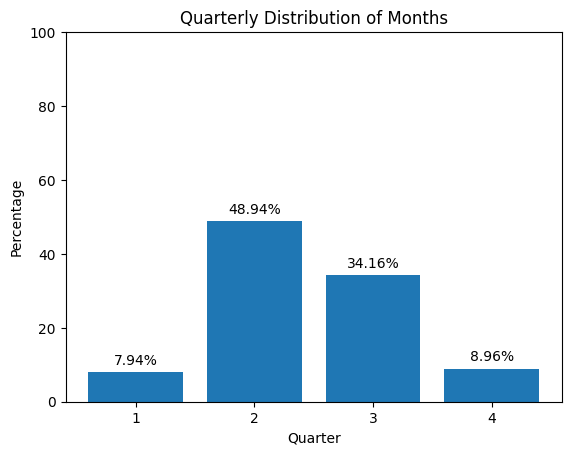

In [ ]:
quartal_counts = df['month_quartal'].value_counts().sort_index()
total_respondents = len(df)
month_percentage = quartal_counts / total_respondents * 100

# Create the bar plot with percentage labels
plt.bar(month_percentage.index, month_percentage.values)
plt.xlabel('Quarter')
plt.ylabel('Percentage')
plt.title('Quarterly Distribution of Months')

# Adding percentage labels on top of the bars
for i, percentage in enumerate(month_percentage):
    plt.text(i + 1, percentage + 2, f'{percentage:.2f}%', ha='center')

plt.xticks(month_percentage.index)
plt.ylim(0, 100)
plt.show()

In [ ]:
# Make segment for duration feature
# Define the bin edges per 5 mins
bin_edges = [1, 300, 600, 900, 1200, 10000]

# Define the bin labels
bin_labels = ['0-5mins', '5-10mins', '10-15mins', '15-20mins', '>=20mins']

# Add a new column with bin categories
df['duration_bin'] = pd.cut(df['duration'], bins=bin_edges, labels=bin_labels, right=False)

print(df)

       age  balance  day month  duration  campaign  pdays  previous poutcome  \
0       58     2143    5   may       261         1     -1         0  unknown   
1       44       29    5   may       151         1     -1         0  unknown   
2       33        2    5   may        76         1     -1         0  unknown   
3       47     1506    5   may        92         1     -1         0  unknown   
4       33        1    5   may       198         1     -1         0  unknown   
...    ...      ...  ...   ...       ...       ...    ...       ...      ...   
45203   23      113   17   nov       266         1     -1         0  unknown   
45205   25      505   17   nov       386         2     -1         0  unknown   
45206   51      825   17   nov       977         3     -1         0  unknown   
45207   71     1729   17   nov       456         2     -1         0  unknown   
45209   57      668   17   nov       508         4     -1         0  unknown   

       y  ...  marital_single  educatio

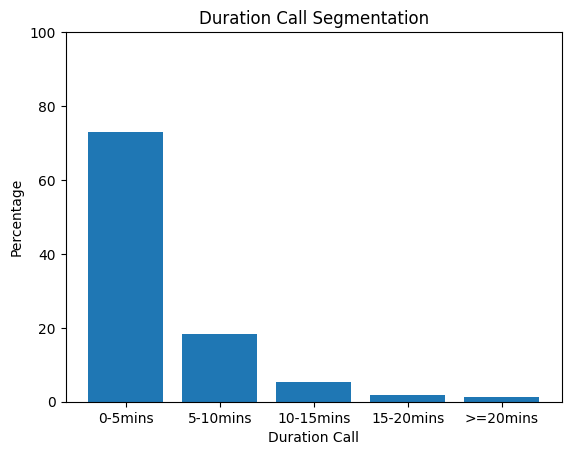

In [ ]:
duration_counts = df['duration_bin'].value_counts().sort_index()
total_respondents = len(df)
duration_percentage = duration_counts / total_respondents * 100

# Create the bar plot with percentage labels
plt.bar(duration_percentage.index, duration_percentage.values)
plt.xlabel('Duration Call')
plt.ylabel('Percentage')
plt.title('Duration Call Segmentation')

plt.xticks(duration_percentage.index)
plt.ylim(0, 100)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45209
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  36954 non-null  int64   
 1   balance              36954 non-null  int64   
 2   day                  36954 non-null  int64   
 3   month                36954 non-null  object  
 4   duration             36954 non-null  int64   
 5   campaign             36954 non-null  int64   
 6   pdays                36954 non-null  int64   
 7   previous             36954 non-null  int64   
 8   poutcome             36954 non-null  object  
 9   y                    36954 non-null  int64   
 10  default_yes          36954 non-null  uint8   
 11  housing_yes          36954 non-null  uint8   
 12  loan_yes             36954 non-null  uint8   
 13  job_admin.           36954 non-null  uint8   
 14  job_blue-collar      36954 non-null  uint8   
 15  job_entrepreneur   

In [ ]:
#OHE duration bin, month_quartal
encodee4 = ['month_quartal', 'duration_bin']

for e in encodee4:
    ohe = pd.get_dummies(df[e], prefix=e, drop_first=False)  # Drop original only
    df = pd.concat([df, ohe], axis=1)  # Concatenate the one-hot encoded columns to the DataFrame

df = df.drop(encodee4, axis=1)  # Drop the original categorical columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45209
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     36954 non-null  int64 
 1   balance                 36954 non-null  int64 
 2   day                     36954 non-null  int64 
 3   month                   36954 non-null  object
 4   duration                36954 non-null  int64 
 5   campaign                36954 non-null  int64 
 6   pdays                   36954 non-null  int64 
 7   previous                36954 non-null  int64 
 8   poutcome                36954 non-null  object
 9   y                       36954 non-null  int64 
 10  default_yes             36954 non-null  uint8 
 11  housing_yes             36954 non-null  uint8 
 12  loan_yes                36954 non-null  uint8 
 13  job_admin.              36954 non-null  uint8 
 14  job_blue-collar         36954 non-null  uint8 
 15  jo

In [ ]:
# Convert uint8 columns to int64
uint8_columns = df.select_dtypes(include=['uint8']).columns
df[uint8_columns] = df[uint8_columns].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45209
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     36954 non-null  int64 
 1   balance                 36954 non-null  int64 
 2   day                     36954 non-null  int64 
 3   month                   36954 non-null  object
 4   duration                36954 non-null  int64 
 5   campaign                36954 non-null  int64 
 6   pdays                   36954 non-null  int64 
 7   previous                36954 non-null  int64 
 8   poutcome                36954 non-null  object
 9   y                       36954 non-null  int64 
 10  default_yes             36954 non-null  int64 
 11  housing_yes             36954 non-null  int64 
 12  loan_yes                36954 non-null  int64 
 13  job_admin.              36954 non-null  int64 
 14  job_blue-collar         36954 non-null  int64 
 15  jo

### Handle class imbalance

In [ ]:
df = df.drop(['month','pdays', 'duration', 'poutcome', 'default_yes'], axis = 1)

**pdays** di delete karena kurang relevan, **month** dan **duration** telah terpakai untuk extraction sedangkan **default** dan **poutcome** di delete karena kurang memberikan informasi yang baik karena adanya imbalance data yang ekstrim sebagai prediktor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45209
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     36954 non-null  int64
 1   balance                 36954 non-null  int64
 2   day                     36954 non-null  int64
 3   campaign                36954 non-null  int64
 4   previous                36954 non-null  int64
 5   y                       36954 non-null  int64
 6   housing_yes             36954 non-null  int64
 7   loan_yes                36954 non-null  int64
 8   job_admin.              36954 non-null  int64
 9   job_blue-collar         36954 non-null  int64
 10  job_entrepreneur        36954 non-null  int64
 11  job_housemaid           36954 non-null  int64
 12  job_management          36954 non-null  int64
 13  job_retired             36954 non-null  int64
 14  job_self-employed       36954 non-null  int64
 15  job_services       

In [ ]:
# × nya adalah atribut yang mempengaruhi target
# y nya adalah target itu sendiri
X = df.drop(['y'], axis = 1)
y = df['y']

print(X.shape)
print(y.shape)

(36954, 38)
(36954,)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45209
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     36954 non-null  int64
 1   balance                 36954 non-null  int64
 2   day                     36954 non-null  int64
 3   campaign                36954 non-null  int64
 4   previous                36954 non-null  int64
 5   housing_yes             36954 non-null  int64
 6   loan_yes                36954 non-null  int64
 7   job_admin.              36954 non-null  int64
 8   job_blue-collar         36954 non-null  int64
 9   job_entrepreneur        36954 non-null  int64
 10  job_housemaid           36954 non-null  int64
 11  job_management          36954 non-null  int64
 12  job_retired             36954 non-null  int64
 13  job_self-employed       36954 non-null  int64
 14  job_services            36954 non-null  int64
 15  job_student        

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution before and after applying SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({0: 26863, 1: 2700})
Class distribution after SMOTE: Counter({0: 26863, 1: 26863})


In [ ]:
print(pd.Series(y_train_resampled).value_counts())

0    26863
1    26863
Name: y, dtype: int64


<Axes: xlabel='y', ylabel='Count'>

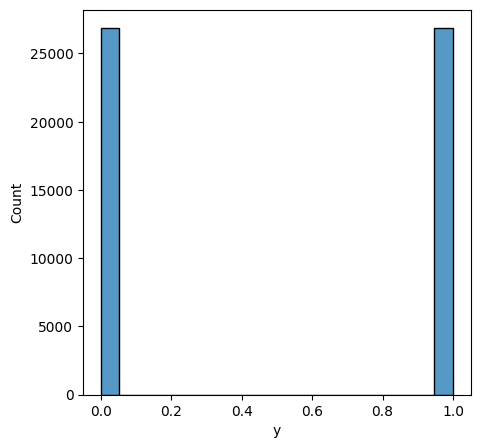

In [ ]:
y_figure = plt.subplots(figsize=(5,5))
sns.histplot(data=y_train_resampled)

Hasil fitur 'y' setelah di SMOTE, menunjukkan jumlah yang seimbang

## Feature Engineering

### Feature Extraction

Kami telah melakukan ekstraksi pada kolom "month" untuk menambah segmen 'kuartal' dan juga kolom "duration" untuk melakukan segmentasi terhadap lamanya durasi panggilan untuk nasabah tertentu. (proses telah dilakukan saat proses OHE).

##### Scaling Dataset

* **robust scaler** perlu digunakan pada kolom 'campaign' dan 'previous' untuk mengatasi distribusi skewed. Dengan menggunakan median dan IQR, robust scaler dapat mengurangi pengaruh outlier pada proses penskalaan dan membantu menghasilkan data yang memiliki distribusi yang lebih terpusat dan terdistribusi secara merata.

In [ ]:
dflist = [X_train_resampled, X_test, X]

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
columns_to_scale = ['campaign','previous', 'age', 'balance']

scaler.fit(X_train_resampled[columns_to_scale])
for i, df in enumerate(dflist):

  data_to_scale = df[columns_to_scale]


  scaled_data = scaler.transform(data_to_scale)

  df[columns_to_scale] = scaled_data


* **Standard Scaler**  perlu digunakan pada kolom sisanya untuk mengubah skala data menjadi standar dan sesuai dengan asumsi distribusi normal. data akan diubah sehingga memiliki rata-rata nol dan simpangan baku satu, sesuai dengan distribusi normal standar.

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
columns_to_standard_scale = [i for i in df.columns.to_list() if not (i in columns_to_scale or i in encodee1 or i in encodee2 or i in encodee4)]
standard_scaler.fit(X_train_resampled[columns_to_standard_scale])
for i, df in enumerate(dflist):
  data_to_standard_scale = df[columns_to_standard_scale]

  standard_scaled_data = standard_scaler.transform(data_to_standard_scale)

  df[columns_to_standard_scale] = standard_scaled_data



### 4 additional features

Fitur yang perlu ada dalam dataset ini adalah sebagai berikut:

1. Pendapatan per bulan (bisa gaji atau upah)
2. Rata-rata pengeluaran per tahun
3. Total broker investasi dimana uang nasabah di invest
4. Gender

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
models = {
    "logistic": LogisticRegression(solver='sag', max_iter=250),
    "RandomForest" :RandomForestClassifier(random_state=42),
    "XGBoost" : XGBClassifier(),
}

In [ ]:
models_precision = {}
models_cm = {}
models_cv_precision_test = {}
models_cv_precision_train = {}

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import cross_validate, StratifiedKFold


def evaluate_classifier(model_name, model):
    Y_pred = model.predict(X_test)
    models_precision[model_name] = precision_score(y_test, Y_pred)

    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    precision_cv = cross_validate(model, X_train_resampled, y_train_resampled, cv=kfold, scoring='precision', return_train_score=True)
    models_cv_precision_train[model_name] = str(precision_cv['train_score'].mean())
    models_cv_precision_test[model_name] = str(precision_cv['test_score'].mean())

    models_cm[model_name] = confusion_matrix(y_test, Y_pred)

In [ ]:
def print_eval(models):
    for i, model_name in enumerate(models):
        print(f'{model_name}:')
        print(f'\t "Precision score" = {models_precision[model_name]}')
        print(f'\t "Precision Cross-Val(train)" = {models_cv_precision_train[model_name]}')
        print(f'\t "Precision Cross-Val(test)" = {models_cv_precision_test[model_name]}')
        print('\n')

In [ ]:
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    print(f'Model: {model_name}')
    evaluate_classifier(model_name, model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model: logistic


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model: RandomForest
Model: XGBoost


In [ ]:
import pandas as pd
from tabulate import tabulate

data = {
    'Model': list(models_precision.keys()),
    'Precision Score': list(models_precision.values()),
    'Precision Cross-Val (Train)': list(models_cv_precision_train.values()),
    'Precision Cross-Val (Test)': list(models_cv_precision_test.values())
}
df = pd.DataFrame(data)

# Convert the DataFrame to a Markdown table
markdown_table = tabulate(df, headers='keys', tablefmt='pipe', showindex=False)

# Print the Markdown table
print(markdown_table)


| Model        |   Precision Score |   Precision Cross-Val (Train) |   Precision Cross-Val (Test) |
|:-------------|------------------:|------------------------------:|-----------------------------:|
| logistic     |          0.575342 |                      0.979443 |                     0.979017 |
| RandomForest |          0.533333 |                      1        |                     0.968589 |
| XGBoost      |          0.561743 |                      0.99097  |                     0.96747  |


Dari 3 algoritma di atas, terlihat dari segi precision untuk CV, semua **relatif tidak ada overfit**, khusus **logistic** terlihat **sangat fit**. Namun, dari segi score untuk presisi, nilai Logistic Regression memiliki nilai yang lebih baik dalam menggambarkan 'y' pada dunia nyata, logistic tertinggi dengan nilai 0.575

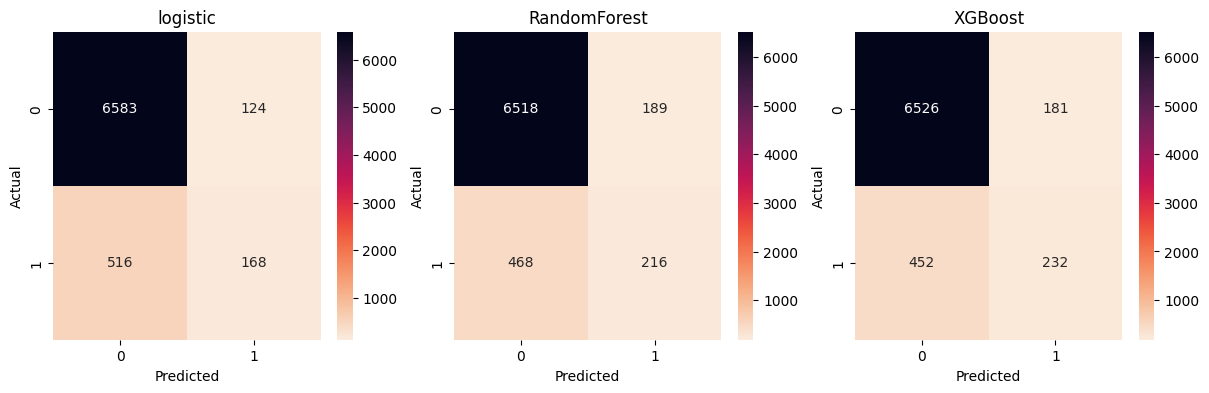

In [ ]:
fig = plt.figure(figsize = (25,4))
for i in range(len(models_cm)):
    model = list(models)[i]
    cm = models_cm[model]

    sub = fig.add_subplot(1, 5, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, fmt="d", cmap = 'rocket_r')
    cm_plot.set_xlabel('Predicted')
    cm_plot.set_ylabel('Actual')

Dari table di atas, GLM memiliki false positive yang cukup mencolok yaitu 1304,
berbeda jauh dari SVM dan RF yang ada di angka hanya 194 dan 191. Namun GLM memiliki prediksi paling banyak untuk True Positive yaitu 520

## HYPERPARAMETER TUNING


In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [300, 400, 500],        # Mengubah nilai max_iter ke 300, 400, 500, atau nilai yang lebih tinggi
    'class_weight': [None, 'balanced'],
    'random_state': [42]
}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
clf = GridSearchCV(models["logistic"], param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train_resampled,y_train_resampled)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


In [ ]:
best_params = best_clf.best_params_
best_model = best_clf.best_estimator_
best_params

In [ ]:
lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train_resampled, y_train_resampled)
Y_pred = lr_clf.predict(X_test)
precision = precision_score(y_test, Y_pred)

kfold = StratifiedKFold(n_splits=5, shuffle=True)
precision_cv = cross_validate(lr_clf, X_train_resampled, y_train_resampled, cv=kfold, scoring='precision', return_train_score=True)
models_cv_precision_train = str(precision_cv['train_score'].mean())
models_cv_precision_test = str(precision_cv['test_score'].mean())

print(f"PRECISION SCORE:\n{precision}")
print(f"CV TRAIN SCORE:\n{models_cv_precision_train}")
print(f"CV TEST SCORE:\n{models_cv_precision_test}")

## Adjusting Threshold based on Precision-Recall-Curve

Using Logistic Regression for building Precision Recall Curve

Shape of Y_pred: (7391, 2)


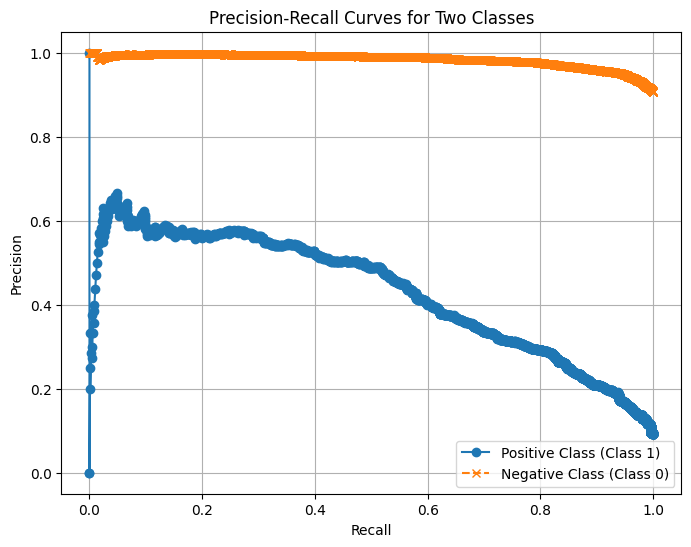

AUC-PR for Positive Class (Class 1): 0.4320


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have already trained and evaluated your model
# Make predictions on the test data
Y_pred = models["logistic"].predict_proba(X_test)

# Check the shape of Y_pred (it should be 2D)
print("Shape of Y_pred:", Y_pred.shape)

# Calculate precision, recall, and thresholds for both classes
precision_pos, recall_pos, thresholds_pos = precision_recall_curve(y_test, Y_pred[:, 1])  # Positive class
precision_neg, recall_neg, thresholds_neg = precision_recall_curve(1 - y_test, 1 - Y_pred[:, 1])  # Negative class

# Plot the Precision-Recall Curves for both classes
plt.figure(figsize=(8, 6))

# Positive class curve (e.g., class 1)
plt.plot(recall_pos, precision_pos, marker='o', linestyle='-', label='Positive Class (Class 1)')

# Negative class curve (e.g., class 0)
plt.plot(recall_neg, precision_neg, marker='x', linestyle='--', label='Negative Class (Class 0)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Two Classes')
plt.grid(True)
plt.legend()
plt.show()

# Calculate AUC-PR for the positive class (Class 1)
auc_pr_pos = average_precision_score(y_test, Y_pred[:, 1])

# Print the AUC-PR
print(f'AUC-PR for Positive Class (Class 1): {auc_pr_pos:.4f}')


In [ ]:
Y_pred = models["logistic"].predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test.values, Y_pred)
df_thres = pd.DataFrame({'Precision': precision[:-1], 'Recall': recall[:-1], 'Threshold': thresholds})
df_thres


,Precision,Recall,Threshold
0,0.092545,1.000000,0.000151
1,0.092558,1.000000,0.000268
2,0.092570,1.000000,0.000569
3,0.092583,1.000000,0.000662
4,0.092595,1.000000,0.001095
...,...,...,...
7386,0.200000,0.001462,0.895592
7387,0.250000,0.001462,0.905082
7388,0.333333,0.001462,0.926799
7389,0.000000,0.000000,0.934145


In [ ]:
df_thres[df_thres['Precision'].between(.65, .7)]

,Precision,Recall,Threshold
7339,0.653846,0.049708,0.791398
7340,0.666667,0.049708,0.792339
7341,0.660000,0.048246,0.794003
7342,0.653061,0.046784,0.795096
7344,0.659574,0.045322,0.798258
7345,0.652174,0.043860,0.798430
7351,0.650000,0.038012,0.809503


In [ ]:
pred_79 = np.where(Y_pred>0.791398, 1, 0)
precision_79 = precision_score(y_test, pred_79)
precision_79

0.6538461538461539

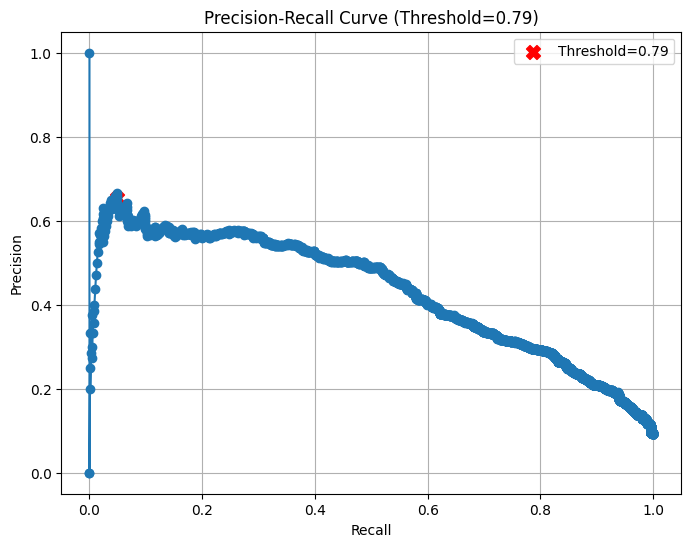

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have already trained and evaluated your model
# Make predictions on the test data
Y_pred_proba = models["logistic"].predict_proba(X_test)

# Adjusted threshold (choose the threshold that worked best for you)
adjusted_threshold = 0.791397  # Modify this threshold as needed

# Calculate precision, recall, and thresholds for the adjusted threshold
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_proba[:, 1])

# Find the index of the threshold that is closest to the adjusted threshold
closest_threshold_index = (abs(thresholds - adjusted_threshold)).argmin()

# Plot the Precision-Recall Curve with the adjusted threshold
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Threshold={adjusted_threshold:.2f})')

# Highlight the point on the curve corresponding to the adjusted threshold
plt.scatter(recall[closest_threshold_index], precision[closest_threshold_index], c='red', marker='X', s=100, label=f'Threshold={adjusted_threshold:.2f}')
plt.legend()
plt.grid(True)
plt.show()


### Re-modelling with threshold adjusted

In [ ]:
models = {
    "logistic": LogisticRegression(solver='sag', max_iter=250),
}

In [ ]:
models_precision = {}
models_cm = {}
models_cv_precision_test = {}
models_cv_precision_train = {}

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import cross_validate, StratifiedKFold


def evaluate_classifier(model_name, model):
    models_precision[model_name] = precision_score(y_test, pred_79)

    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    precision_cv = cross_validate(model, X_train_resampled, y_train_resampled, cv=kfold, scoring='precision', return_train_score=True)
    models_cv_precision_train[model_name] = str(precision_cv['train_score'].mean())
    models_cv_precision_test[model_name] = str(precision_cv['test_score'].mean())

    models_cm[model_name] = confusion_matrix(y_test, pred_79)

In [ ]:
def print_eval(models):
    for i, model_name in enumerate(models):
        print(f'{model_name}:')
        print(f'\t "Precision score" = {models_precision[model_name]}')
        print(f'\t "Precision Cross-Val(train)" = {models_cv_precision_train[model_name]}')
        print(f'\t "Precision Cross-Val(test)" = {models_cv_precision_test[model_name]}')
        print('\n')

In [ ]:
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    print(f'Model: {model_name}')
    evaluate_classifier(model_name, model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model: logistic


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
import pandas as pd
from tabulate import tabulate

data = {
    'Model': list(models_precision.keys()),
    'Precision Score': list(models_precision.values()),
    'Precision Cross-Val (Train)': list(models_cv_precision_train.values()),
    'Precision Cross-Val (Test)': list(models_cv_precision_test.values())
}
df = pd.DataFrame(data)

# Convert the DataFrame to a Markdown table
markdown_table = tabulate(df, headers='keys', tablefmt='pipe', showindex=False)

# Print the Markdown table
print(markdown_table)


| Model    |   Precision Score |   Precision Cross-Val (Train) |   Precision Cross-Val (Test) |
|:---------|------------------:|------------------------------:|-----------------------------:|
| logistic |          0.653846 |                      0.979637 |                     0.978875 |


Hasil dari logistic regression berubah menjadi 0.653 dari yang sebelumnya hanya 0.575 setelah penyesuaian threshold

## Feature Importance

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


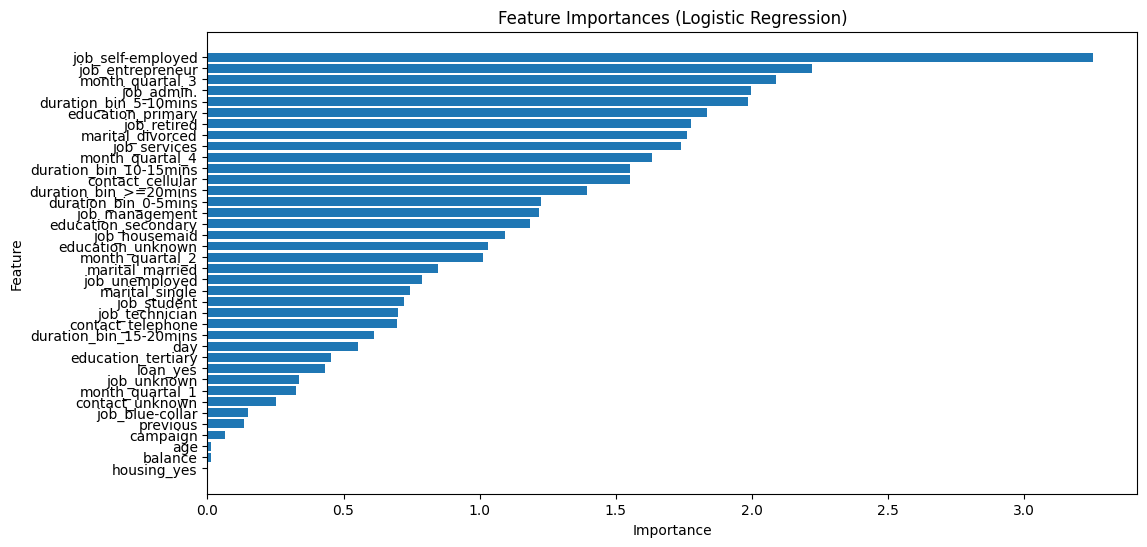

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Create and train a LogisticRegression model
model = LogisticRegression(max_iter=250, solver='sag')
model.fit(X_train_resampled, y_train_resampled)

# Get feature importances from the coefficients
feature_importances = np.abs(model.coef_[0])  # Absolute values of coefficients

# Get the names of the features (assuming you have them in a list)
feature_names = [
    'age', 'balance', 'campaign', 'previous', 'housing_yes', 'loan_yes',
    'job_blue-collar', 'job_management', 'job_retired', 'job_student', 'job_technician',
    'marital_divorced', 'marital_married', 'marital_single', 'education_secondary',
    'education_tertiary', 'contact_cellular', 'contact_telephone',
    'month_quartal_1', 'month_quartal_2', 'month_quartal_3', 'month_quartal_4',
    'duration_bin_0-5mins', 'duration_bin_5-10mins','duration_bin_10-15mins',
    'duration_bin_15-20mins', 'duration_bin_>=20mins', 'day', 'education_primary',
    'education_unknown', 'job_admin.', 'job_entrepreneur', 'job_housemaid',
    'job_self-employed','job_services', 'job_unemployed', 'job_unknown', 'contact_unknown'
]  # Replace with your feature names

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()
